<a href="https://colab.research.google.com/github/somnathsingh31/Projects/blob/Temperory/stock_forecasting_ARIMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this project, our goal is to predict the stock price of Infosys. We've used three years of daily stock data, splitting it into two parts: 80% for training and 20% for testing. For modeling, we have chosen the ARIMA model, and its parameters have been determined through the application of the Augmented Dickey-Fuller (ADF) test, as well as the analysis of AutoCorrelation Function (ACF) and Partial AutoCorrelation Function (PACF) plots.






In [399]:
import pandas as pd
import numpy as np
from datetime import date

In [400]:
infosys = pd.read_csv('/content/Infosys.csv', index_col=False)

In [401]:
infosys["Date"] = pd.to_datetime(infosys["Date"])
infosys = infosys.sort_values(by='Date')
infosys.set_index('Date', inplace=True)

In [402]:
import matplotlib.pyplot as plt
import seaborn as sns

In [403]:
train = infosys.iloc[:550]
test = infosys.iloc[550:]

In [404]:
train.head(5)

,Price
Date,
2021-01-01,1260.45
2021-01-04,1288.25
2021-01-05,1293.80
2021-01-06,1282.10
2021-01-07,1262.15


In [405]:
test.head(5)

,Price
Date,
2023-03-21,1390.70
2023-03-22,1389.25
2023-03-23,1374.55
2023-03-24,1380.65
2023-03-27,1388.95


<Axes: xlabel='Date'>

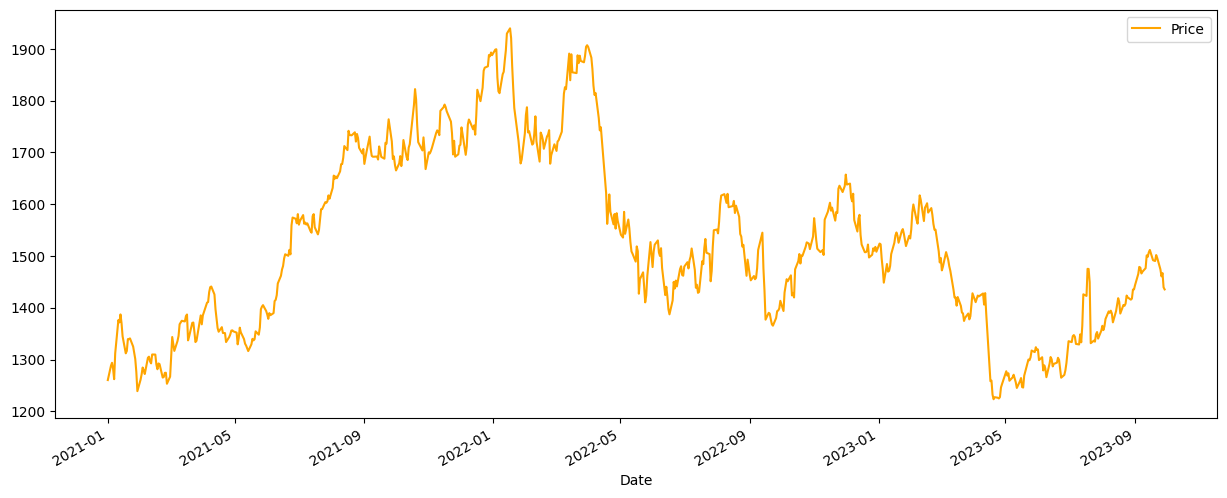

In [406]:
infosys.plot(figsize = (15,6), color = 'orange')

In [407]:
from statsmodels.tsa.seasonal import seasonal_decompose

The time series data has been decomposed into trends and seasonality. It is evident from the plot that the data does not exhibit seasonality. Therefore, we will consider an ARIMA model, which is the most suitable choice in this case.

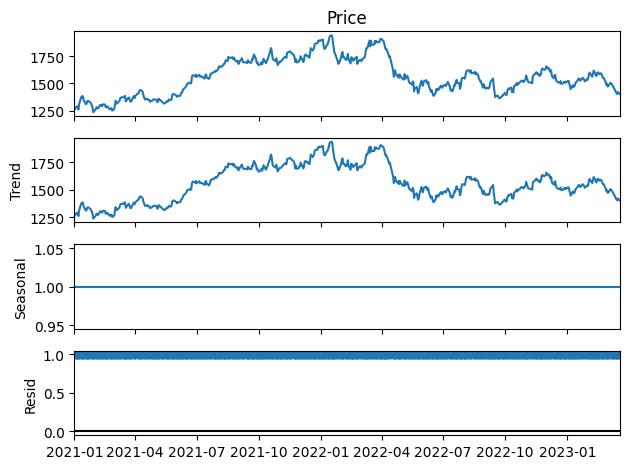

In [408]:
decomposed = seasonal_decompose(train['Price'], model="multiplicative", period=1)
decomposed.plot()
plt.show()

The Augmented Dickey-Fuller (ADF) test can be used to find 'd' value of ARIMA model. It rejects the null hypothesis that the given time-series data is non-stationary. If the p-value calculated is below 0.05, then the data is stationary else, the differencing order is incremented by one. As we see below, after the 1st order differencing, the p-value drops to 0. Thus, we can consider the order of differencing (“d”) as 1.

In [409]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(train['Price'].dropna())
print('p value of hypothesis testing: ', result[1])

result = adfuller(train['Price'].diff().dropna())
print('p value of hypothesis testing of first order differencing: ', result[1])


p value of hypothesis testing:  0.24313017504677514
p value of hypothesis testing of first order differencing:  1.0418179089581559e-29


The data has been stationazed by differencing once. Now we can check the PACF of the first-order difference to find 'p' value and ACF of the first-order difference to find 'q' value. As below, PACF is not significant after one, therefore p is 1 and ACF is not significant after one, therefore q is 1.

In [410]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

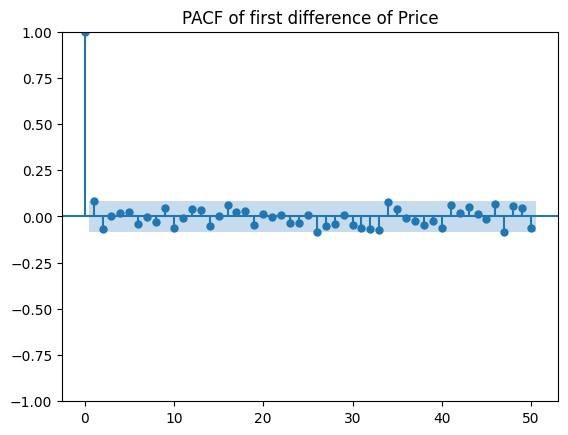

In [411]:
plot_pacf(train['Price'].diff().dropna(), lags= 50)
plt.title("PACF of first difference of Price")
plt.show()

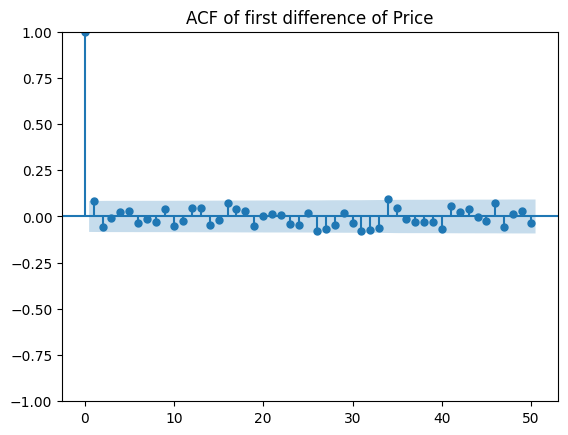

In [412]:
plot_acf(train['Price'].diff().dropna(), lags= 50)
plt.title("ACF of first difference of Price")
plt.show()

In [413]:
from statsmodels.tsa.arima.model import ARIMA

In [414]:
#Fiiting the model on training data
historical_price = [x for x in train['Price']]
predictions = []
for price in range(len(test)):
  model = ARIMA(historical_price, order=(1,1,1))
  model_fit = model.fit()
  predict = model_fit.forecast()
  predictions.append(predict[0])
  historical_price.append(test['Price'][price])


print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  680
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -3105.756
Date:                Sat, 30 Sep 2023   AIC                           6217.512
Time:                        23:07:51   BIC                           6231.074
Sample:                             0   HQIC                          6222.762
                                - 680                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3534      0.293     -1.208      0.227      -0.927       0.220
ma.L1          0.4503      0.279      1.612      0.107      -0.097       0.998
sigma2       550.1030     18.682     29.445      0.0

In [415]:
#Predicted data
df_pred = pd.DataFrame(predictions)
df_pred = df_pred.set_index(test.index)

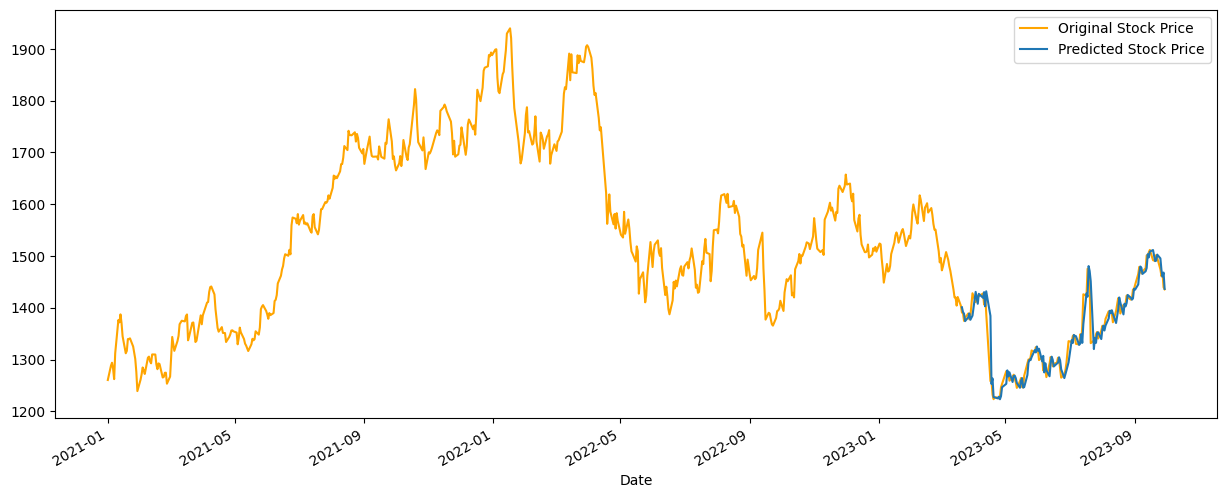

In [416]:
ax = infosys.plot(figsize = (15,6), color = 'orange')
df_pred.plot(ax = ax)
ax.legend(["Original Stock Price", "Predicted Stock Price"]);

In [417]:
import math
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

In [418]:
# performance of the model
mse = mean_squared_error(test["Price"], df_pred)
print('MSE: '+str(mse))
mae = mean_absolute_error(test["Price"], df_pred)
print('MAE: '+str(mae))
mape = mean_absolute_percentage_error(test["Price"], df_pred)
print('MAPE: '+str(mape))
rmse = math.sqrt(mean_squared_error(test["Price"], df_pred))
print('RMSE: '+str(rmse))

MSE: 481.7371107657843
MAE: 13.858175831843363
MAPE: 0.010248668576527181
RMSE: 21.948510445262208
